In [1]:
import hdbscan
import seaborn as sns
import torchvision.transforms
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt


[-1 -1 -1 -1 -1 -1 -1  0  1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  0 -1 -1
 -1  1 -1  0  1 -1  0 -1  0  1 -1  0  1  1 -1  1]


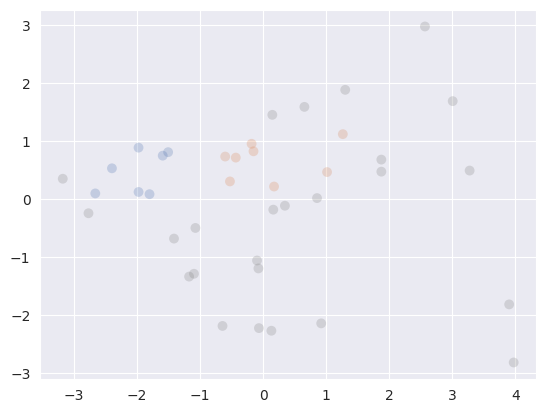

In [3]:
from backend.feature_extraction.feature_extractor import get_feature_extractor

data = ImageFolder(root='/home/alireza/repositories/viennaup23-hackathon-recycling/data/trash',
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Resize(size=(256, 256),
                                         interpolation=transforms.InterpolationMode.NEAREST)]))
loader = DataLoader(data, batch_size=100, shuffle=False)


x, _ = next(iter(loader))

m = get_feature_extractor()

# z = m(x)
y = m.forward_project_pca(x)
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)
clusterer.fit(y)
color_palette = sns.color_palette('deep', 8)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
print(clusterer.labels_)
plt.scatter(*y.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)